In [2]:
#!/usr/bin/env python

'''
DESCRIPTION
-----------
    Evaluation metrics for trained model
    
RETURN
------
    {EVALUATION-METRIC}.csv : csv file
        Evaluation metrics scores


EXPORTED FILE(s) LOCATION
-------------------------
    ./models/{NN or CV}/{EXPERIMENT}/{EVALUATION-METRIC}.csv
'''

# importing default libraries
# import os, argparse, sys
# sys.path.append('./')
import os, sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)

In [3]:
# importing scripts in scripts folder
from scripts import config as src
# importing default libraries
import numpy as np
import pandas as pd
import datetime as dt
import glob
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

time_start = dt.datetime.now().time().strftime('%H:%M:%S') # = time.time() dt.datetime.now().strftime('%Y%m%d_%I%M%S%p')

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [4]:
split = 'StratifiedKFold'
experiment = 'exper_melanoma'


loc_read = os.path.join(src.DIR_MODELS, experiment, split)
# the output location
loc_output = os.path.join(src.DIR_REPORTS, 'evaluate', experiment, split, )
src.define_folder(loc_=loc_output)

FOLDER information,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate/exper_melanoma/StratifiedKFold/


'/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate/exper_melanoma/StratifiedKFold/'

In [12]:
df_result = pd.DataFrame()
for i in glob.glob(os.path.join(loc_read, 'result*_signaling*')):
    
    df_temp = pd.read_pickle(i)
#     df_temp = df_temp.rename(columns={'pred':'prediction'})
    df_result = pd.concat([df_result, df_temp])

df_result

,B.cell,Macrophage,NK,T.CD4,T.CD8,prediction,ground_truth,design,index_split,split
0,1.000000e+00,9.771427e-12,6.202776e-11,7.791282e-11,3.978219e-08,B.cell,B.cell,1_layer_signaling,0,StratifiedKFold
1,1.000000e+00,1.107864e-12,2.299809e-12,3.312890e-11,2.766020e-09,B.cell,B.cell,1_layer_signaling,0,StratifiedKFold
2,9.980010e-01,4.931509e-07,2.797756e-08,5.381837e-06,1.993065e-03,B.cell,B.cell,1_layer_signaling,0,StratifiedKFold
3,9.999996e-01,5.819293e-11,1.522006e-10,7.268912e-10,3.780913e-07,B.cell,B.cell,1_layer_signaling,0,StratifiedKFold
4,9.999977e-01,3.606444e-11,1.444099e-10,8.198833e-08,2.102655e-06,B.cell,B.cell,1_layer_signaling,0,StratifiedKFold
...,...,...,...,...,...,...,...,...,...,...
547,1.085663e-08,5.972621e-10,1.369297e-05,1.163491e-09,9.999863e-01,T.CD8,T.CD8,2_layer_signaling,4,StratifiedKFold
548,9.094672e-07,2.189343e-06,3.090190e-07,9.384858e-03,9.906117e-01,T.CD8,T.CD8,2_layer_signaling,4,StratifiedKFold
549,6.745958e-07,3.401468e-07,1.261425e-04,6.158313e-05,9.998112e-01,T.CD8,T.CD8,2_layer_signaling,4,StratifiedKFold
550,1.174173e-07,8.059031e-09,2.301286e-05,1.382113e-06,9.999754e-01,T.CD8,T.CD8,2_layer_signaling,4,StratifiedKFold


In [13]:
# list_homo, list_comp, list_vmes, list_ari, list_ami, list_fm, list_acc = [],[],[],[],[],[],[]
#         list_homo.append([homogeneity_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'homogeneity'])
#         list_comp.append([completeness_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'completeness'])
#         list_vmes.append([v_measure_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'v_measure'])
#         list_ari.append([adjusted_rand_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'ari'])
#         list_ami.append([adjusted_mutual_info_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'ami'])
#         list_fm.append([fowlkes_mallows_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'fowlkes_mallows'])

list_f1, list_precision, list_recall, list_acc, list_bacc = [],[],[],[],[]

for i_design in df_result['design'].unique():
    print('DESIGN', i_design)
    for i_exp in df_result['index_split'].unique():
        df_temp = df_result[(df_result['index_split']==i_exp) & (df_result['design']==i_design)]
        
        for i_average in ['micro','macro','weighted']:
            list_f1.append([f1_score(df_temp['ground_truth'], df_temp['prediction'], average=i_average), i_exp, i_design, 'f1-'+i_average])
            list_precision.append([precision_score(df_temp['ground_truth'], df_temp['prediction'], average=i_average), i_exp, i_design, 'precision-'+i_average])
            list_recall.append([recall_score(df_temp['ground_truth'], df_temp['prediction'], average=i_average), i_exp, i_design, 'recall-'+i_average])
        list_acc.append([accuracy_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'accuracy'])
        list_bacc.append([balanced_accuracy_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'balanced accuracy'])
        
# result = [element for lis in [list_homo, list_comp, list_vmes, list_ari, list_ami, list_fm, list_f1, list_precision, list_recall, list_acc, list_bacc] for element in lis]
result = [element for lis in [list_f1, list_precision, list_recall, list_acc, list_bacc] for element in lis]

df_metric = pd.DataFrame(result, columns=['score','expr','design','metric'])
print(df_metric.shape)
df_metric.head()

DESIGN 1_layer_signaling
DESIGN 2_layer_signaling
(110, 4)


,score,expr,design,metric
0,0.938517,0,1_layer_signaling,f1-micro
1,0.795389,0,1_layer_signaling,f1-macro
2,0.930107,0,1_layer_signaling,f1-weighted
3,0.949275,1,1_layer_signaling,f1-micro
4,0.888952,1,1_layer_signaling,f1-macro


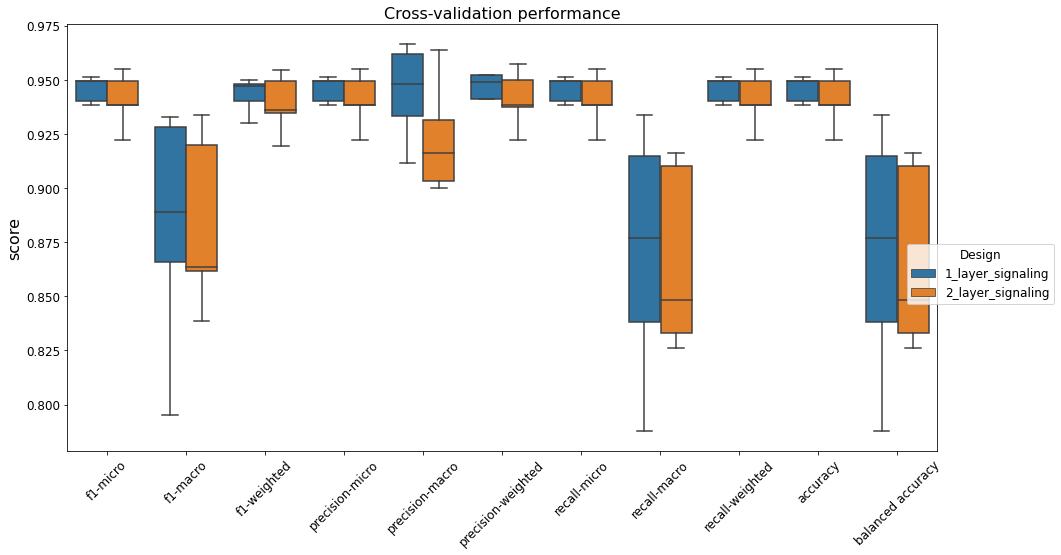

In [14]:
sns.set_palette("tab10")
plt.figure(figsize=(15,8))
sns.boxplot(data=df_metric, x='metric', y='score', hue='design');
plt.xticks(rotation=5)
plt.xlabel('')
# legend = plt.legend(title='Proposed network', loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=False, shadow=False, ncol=2)
legend = plt.legend(title='Design', loc='upper center', bbox_to_anchor=(1.05, 0.5))
legend.get_title().set_fontsize(SMALL_SIZE) #legend 'Title' fontsize
plt.xticks(rotation=45)
plt.title('Cross-validation performance')
plt.tight_layout();
plt.savefig(os.path.join(loc_output,('1_metrics.png')), dpi=300, bbox_inches = 'tight')

In [15]:
list_f1, list_precision, list_recall = [],[],[]
keys_all = sorted(df_result['ground_truth'].unique())
dict_ = {key: None for key in keys_all}
for i_design in df_result['design'].unique():
    print('DESIGN', i_design)
    
    for i_exp in df_result['index_split'].unique():
        df_temp = df_result[(df_result['index_split']==i_exp) & (df_result['design']==i_design)]
#         F1 score
        tmp = f1_score(df_temp['ground_truth'], df_temp['prediction'], average=None)
        keys = sorted(df_temp['ground_truth'].unique())
        dict_t = dict(zip(keys, tmp))
        dict_tmp = {'experience':i_exp, 'design':i_design, 'metric':'f1'}
        dict_t.update(dict_tmp)
        list_f1.append({**dict_, **dict_t})
        
#         PRECISION score
        tmp = precision_score(df_temp['ground_truth'], df_temp['prediction'], average=None)
        keys = sorted(df_temp['ground_truth'].unique())
        dict_t = dict(zip(keys, tmp))
#         dict_t['experience'] = i_exp
#         dict_t['design'] = i_design
#         dict_t['metric'] = 'precision'
        dict_tmp = {'experience':i_exp, 'design':i_design, 'metric':'precision'}
        dict_t.update(dict_tmp)
        list_precision.append({**dict_, **dict_t})
        
#         RECALL score
        tmp = recall_score(df_temp['ground_truth'], df_temp['prediction'], average=None)
        keys = sorted(df_temp['ground_truth'].unique())
        dict_t = dict(zip(keys, tmp))
        dict_tmp = {'experience':i_exp, 'design':i_design, 'metric':'recall'}
        dict_t.update(dict_tmp)
        list_recall.append({**dict_, **dict_t})

DESIGN 1_layer_signaling
DESIGN 2_layer_signaling


In [19]:
col = sorted(df_temp['ground_truth'].unique())
col.extend(['expr','design','metric'])

result = [element for lis in [list_f1, list_precision, list_recall] for element in lis]

df_label = pd.DataFrame(result, columns=col)
# df_label

df_label_melt = pd.melt(frame=df_label, id_vars=['design','metric','expr'])
# df_label_melt

<Figure size 1080x576 with 0 Axes>

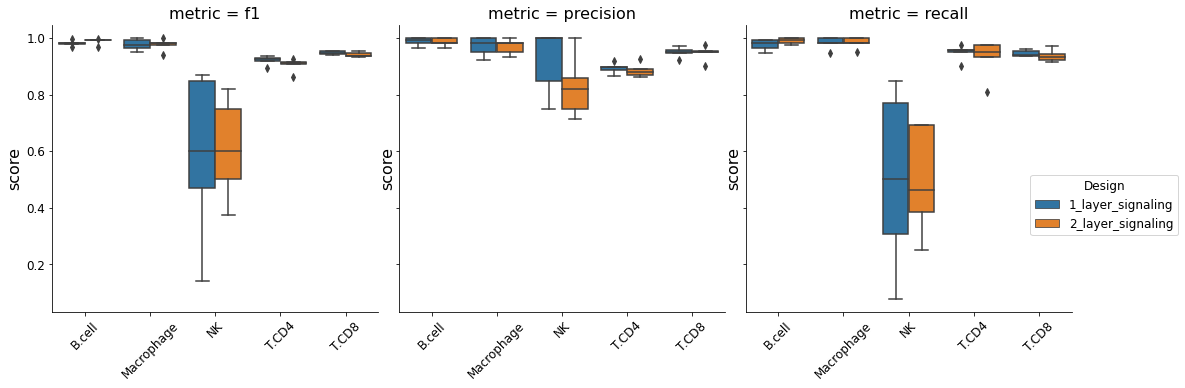

In [20]:
plt.figure(figsize=(15,8));
g=sns.catplot(data=df_label_melt, x='variable', y='value', hue='design', col='metric', kind="box", legend=False);
g.set(xlabel=None, ylabel='score')
g.set_xticklabels(rotation=45)
legend = plt.legend(title='Design', loc='upper center', bbox_to_anchor=(1.1, 0.5))
legend.get_title().set_fontsize(SMALL_SIZE) #legend 'Title' fontsize
# plt.tight_layout();
plt.savefig(os.path.join(loc_output,'2_f1_precision_recall.png'), dpi=300, bbox_inches = 'tight');

DESIGN 1_layer_signaling
DESIGN 2_layer_signaling


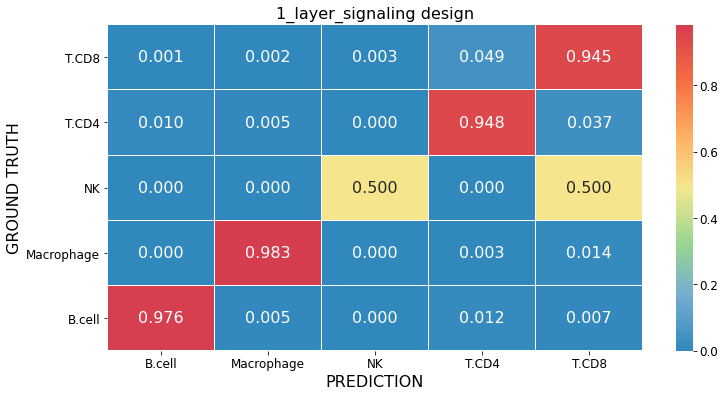

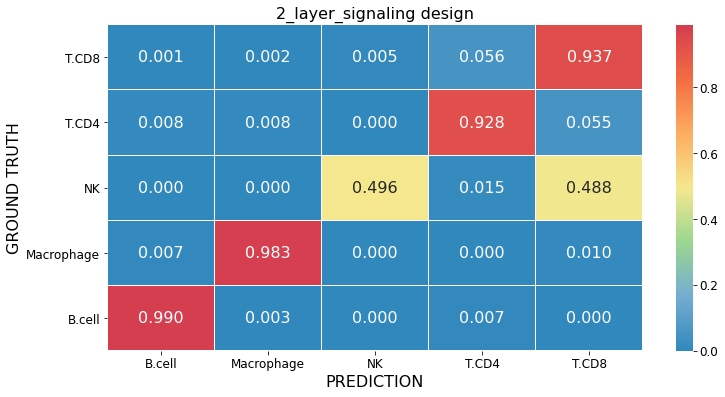

In [17]:
# sns.set_context("notebook")
for i_design in df_result['design'].unique():
    df_concat = pd.DataFrame()
    print('DESIGN', i_design)
    for i_exp in df_result['index_split'].unique():
#         print('experiment', i_exp)
        df_temp = df_result[(df_result['index_split']==i_exp) & (df_result['design']==i_design)]
#         print(len(df_temp))
        df_crosstab = pd.crosstab(df_temp['ground_truth'], df_temp['prediction']).div(df_temp['ground_truth'].value_counts(), axis=0)
#         df_concat = pd.concat([df_concat, df_crosstab])
        df_concat = df_concat.add(df_crosstab, fill_value=0)
#     print(i_exp+1)
    plot_cm = src.heatmap_cv(df_concat[::-1]/(i_exp+1), (i_design+' design'))
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'.png'), dpi=300, bbox_inches = 'tight')